<a href="https://colab.research.google.com/github/mrpintime/Student_Performance_V1/blob/main/Student_Performance_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Performance Analysis  
**Created by mrpintime**

# DataSet Information  

This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (see paper source for more details).  

# Attribute Information:  

### Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:  
1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)  
2 sex - student's sex (binary: 'F' - female or 'M' - male)  
3 age - student's age (numeric: from 15 to 22)  
4 address - student's home address type (binary: 'U' - urban or 'R' - rural)  
5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)  
6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)  
7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4 - higher education)  
8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 - 5th to 9th grade, 3 - secondary education or 4- higher education)  
9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')  
11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')  
12 guardian - student's guardian (nominal: 'mother', 'father' or 'other')  
13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)  
14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)  
15 failures - number of past class failures (numeric: n if 1<=n<3, else 4)  
16 schoolsup - extra educational support (binary: yes or no)  
17 famsup - family educational support (binary: yes or no)  
18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)  
19 activities - extra-curricular activities (binary: yes or no)  
20 nursery - attended nursery school (binary: yes or no)  
21 higher - wants to take higher education (binary: yes or no)  
22 internet - Internet access at home (binary: yes or no)  
23 romantic - with a romantic relationship (binary: yes or no)  
24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)  
25 freetime - free time after school (numeric: from 1 - very low to 5 - very high)  
26 goout - going out with friends (numeric: from 1 - very low to 5 - very high)  
27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)  
28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)  
29 health - current health status (numeric: from 1 - very bad to 5 - very good)  
30 absences - number of school absences (numeric: from 0 to 93)  

# these grades are related with the course subject, Math or Portuguese:  
31 G1 - first period grade (numeric: from 0 to 20)  
31 G2 - second period grade (numeric: from 0 to 20)  
32 G3 - final grade (numeric: from 0 to 20, output target)


# Problem
The main problem here that we can turn it into business advantage is to find out that students progress from demographic and family relation data and personal features.
## Advantage
1. **Easy to collect data**: Predict scores of student using easy to collect data

2. **Targeted Intervention and Support**: By predicting which students may struggle to achieve high scores, teachers and staff can intervene early, offering additional support, resources, and personalized attention. This can improve student outcomes and overall school performance.

3. **Resource Allocation**: Schools can more effectively allocate resources, such as tutors, materials, and time, based on the predictions. This ensures that resources are not wasted and are directed where they are most needed.

4. **Student Performance Tracking**: The model can track student performance over time, providing valuable data on the effectiveness of teaching strategies and interventions. This can help in continuous improvement of educational practices.

5. **Parental and Student Engagement**: Providing students and parents with insights into potential performance can motivate both to take proactive steps for improvement, leading to better engagement with the educational process.

6. **Marketing and Reputation Building**: Improved student outcomes can enhance the school's reputation, making it more attractive to prospective students and parents, and potentially increasing enrollment and funding opportunities.

7. **Identifying At-Risk Students** and many more.

---

# Objects
1. Understand relations between features and G1-G2-G3 Scores of Students  
2. Find effective features that have significant impact on Scores of Students
3. Develpe Machine Learnirng model to predict student score in percise and efficient way  
4. Create a Report For Approche

# Outlines  
> 0. Setup
> 1. Dataset Cleaning  
> 2. Exploratory Data Analysis   
> 3. Outlier Detection
> 4. Feature Engineering
> 5. PCA, Deep Learning Encoder   
> 6. Machine Learning Implementation
  1. Preprocessing
  2. Traditional Machine Learning
  3. Deep Learning Model  
> 7. Review
> 8. Conclusion
> 9. Next Steps

# Setup

In [ ]:
# connect to google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
## import libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
#for use ANOVA
from scipy import stats

#subpress warnings
def warn(*args, **kwargs):
  pass
import warnings
warnings.warn = warn


from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
# Preprocessing allows us to standarsize our data
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, MinMaxScaler
# Allows us to split our data into training and testing data and evaluate data on k-fold
from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
# evaluate Linear regression model
from sklearn.metrics import mean_squared_error
# import deep learning model
import tensorflow as tf


%matplotlib inline

In [ ]:
# import dataset
#dataset url https://archive.ics.uci.edu/ml/datasets/student+performance#
df_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Student Performance/dataset/merged.csv")

In [ ]:
df = df_data.copy() # save original dataset

# Dataset Cleaning

Check Name of Columns

In [ ]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

I think columns already are in the best way to express with respect to thier name.

based on dataset information we know that `G1`,`G2`,`G3` are highly correlated therefore for simplicity we only use check releation between features and `G3`.

In [ ]:
df[['G1','G2','G3']].cov() # covariance matrix

G1         G2         G3
G1  8.900639   8.416207   9.329573
G2  8.416207  10.791692  11.562913
G3  9.329573  11.562913  14.936647

In [ ]:
df[['G1','G2','G3']].corr() # Pearson correlation matrix

G1        G2        G3
G1  1.000000  0.858739  0.809142
G2  0.858739  1.000000  0.910743
G3  0.809142  0.910743  1.000000

We can see G1, G2, G3 are highly correlated

Check null and redundant values

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.index.is_unique

True

In [ ]:
df.isnull().sum()

school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

We do not have any `duplicate` and `null` values.

Lets see info of Dataset.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1044 entries, 0 to 1043
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      1044 non-null   object
 1   sex         1044 non-null   object
 2   age         1044 non-null   int64 
 3   address     1044 non-null   object
 4   famsize     1044 non-null   object
 5   Pstatus     1044 non-null   object
 6   Medu        1044 non-null   int64 
 7   Fedu        1044 non-null   int64 
 8   Mjob        1044 non-null   object
 9   Fjob        1044 non-null   object
 10  reason      1044 non-null   object
 11  guardian    1044 non-null   object
 12  traveltime  1044 non-null   int64 
 13  studytime   1044 non-null   int64 
 14  failures    1044 non-null   int64 
 15  schoolsup   1044 non-null   object
 16  famsup      1044 non-null   object
 17  paid        1044 non-null   object
 18  activities  1044 non-null   object
 19  nursery     1044 non-null   object
 20  higher  

In [ ]:
num_columns = df.select_dtypes(exclude='object').columns.to_list()
num_columns

['age',
 'Medu',
 'Fedu',
 'traveltime',
 'studytime',
 'failures',
 'famrel',
 'freetime',
 'goout',
 'Dalc',
 'Walc',
 'health',
 'absences',
 'G1',
 'G2',
 'G3']

In [ ]:
obj_columns = df.select_dtypes(include='object').columns.to_list()
obj_columns

['school',
 'sex',
 'address',
 'famsize',
 'Pstatus',
 'Mjob',
 'Fjob',
 'reason',
 'guardian',
 'schoolsup',
 'famsup',
 'paid',
 'activities',
 'nursery',
 'higher',
 'internet',
 'romantic']

We have some numeric columns that are `Not Countable`.  
We have some numeric columns that are encoded version of a `Categorical Variable`.

# Exploratory Data Analysis   
We will do some ```Univariant``` , ```Bivariant``` and ```Multivariant``` Analysis to understand dataset.

In [ ]:
#- we add some numerical variables to obj features category
new_obj = obj_columns + ['famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'traveltime', 'studytime', 'Medu', 'Fedu']
len(new_obj)

27

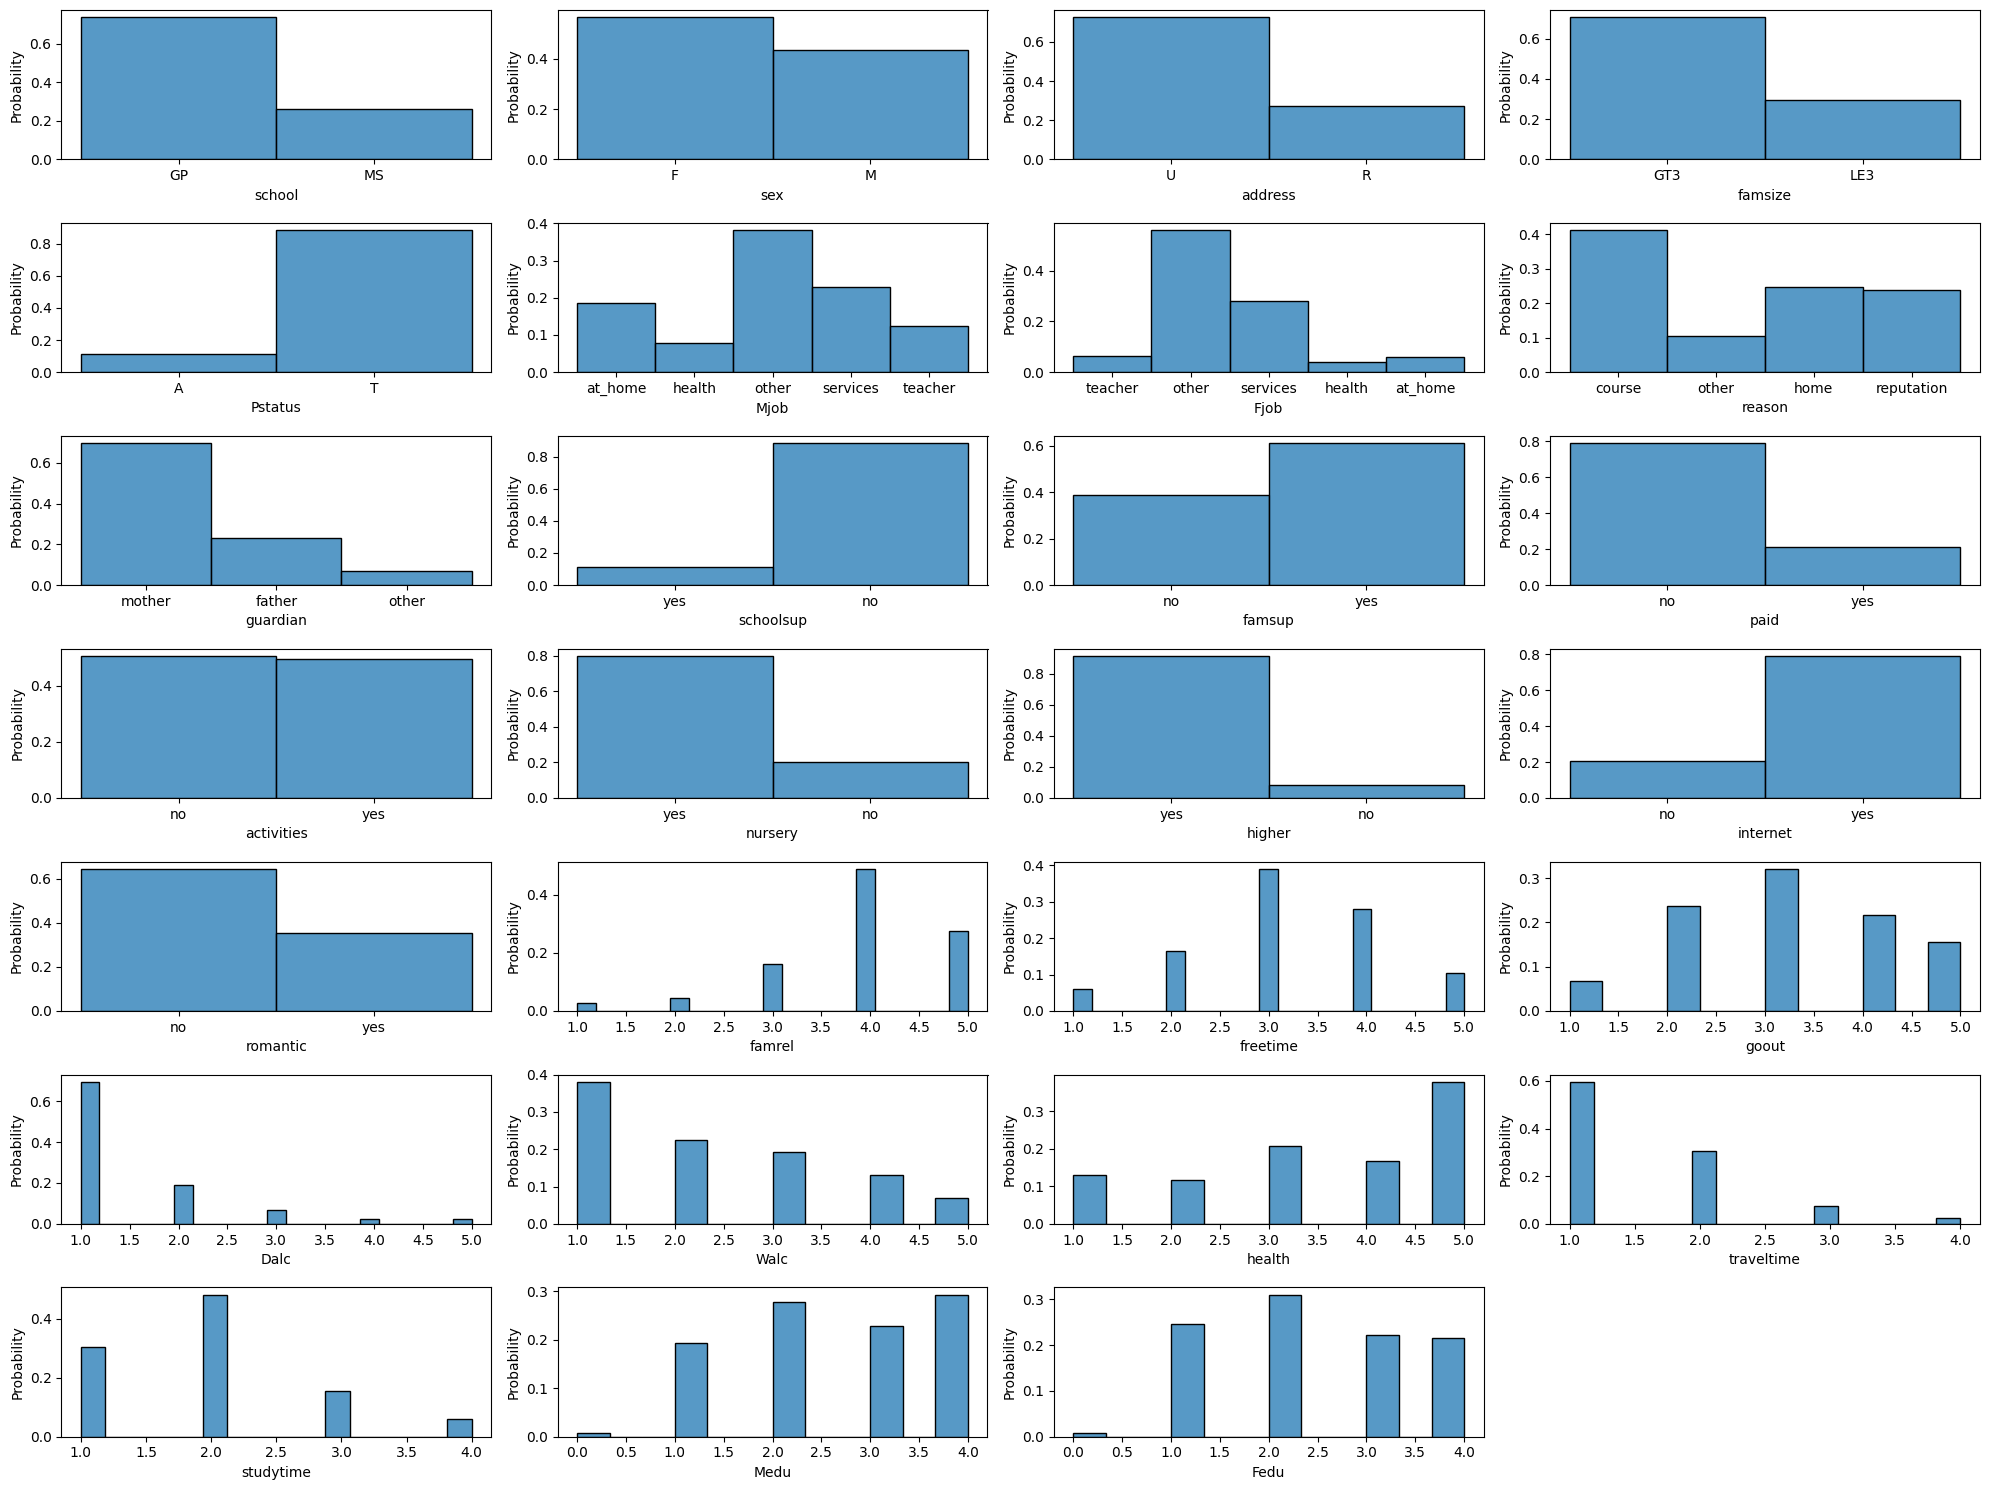

In [ ]:
fig = plt.figure(figsize=(20,15))

for index,i in enumerate(new_obj):

  ax = fig.add_subplot(7,4,index+1)
  sns.histplot(data=df, x=i, stat='probability', ax=ax)
  plt.tight_layout()

* most categorical features have obvious diffrence in their specific values except `activities` that `no` and `yes` are equal in overal.
* Most of student overally situation is :   
    1. are in `GP` school.  
    2. are `Female`.
    3. are in `Urban` area.
    4. have `family size` greater than `3`.  
    5. their `parents` live `together`.  
    6. they do `not` have `Extra educational support`.
    7. they have `family support`.
    8. they did `not` pay money for `extra classes`.  
    9. they attended in `nursery school`.
    10. they want to `take higher education`.
    11. they have `internet connection`.
    12. they do `not` have `romantic relationship`.

---

activities feature means student has extra curricular activities or not that its values are equally spread between `yes` and `no`.

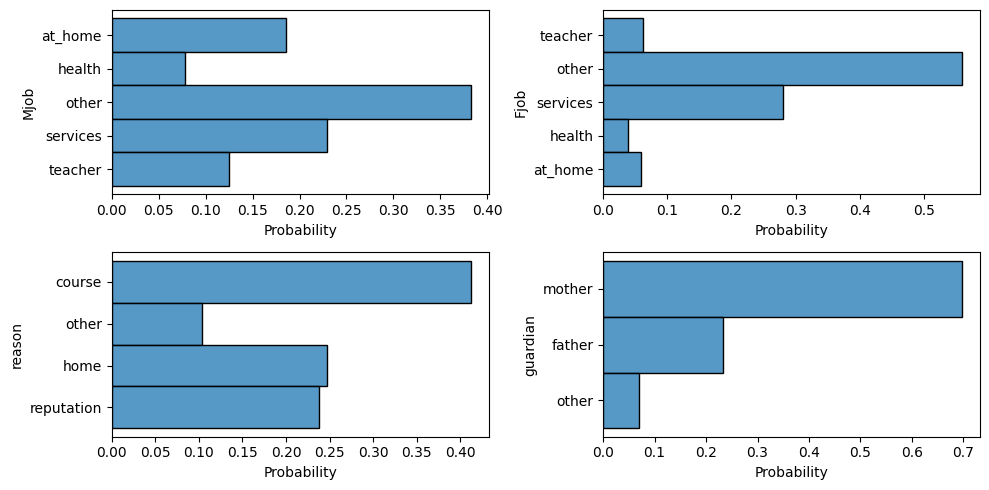

In [ ]:
fig = plt.figure(figsize=(10,5))
for index,i in enumerate(['Mjob', 'Fjob', 'reason', 'guardian']):
    ax = fig.add_subplot(2,2,index+1)
    sns.histplot(y=df[i], stat='probability', ax=ax)
plt.tight_layout()

in overal between students  
* `50 percent` of Fathers and Mothers work at `services jobs (e.g. administrative or police)` or `other`.  
* most student have their `mother` as their `guardian`.
* `home` and `reputation` have equal involment in reason to choose school.
* `course` of the school has the most involment in reson to choose school.  

With all this results we want to see how much `G1, G2, G3 are spread`

In [ ]:
df[['G1','G2','G3']].describe().iloc[1:, ]

G1         G2         G3
mean  11.213602  11.246169  11.341954
std    2.983394   3.285071   3.864796
min    0.000000   0.000000   0.000000
25%    9.000000   9.000000  10.000000
50%   11.000000  11.000000  11.000000
75%   13.000000  13.000000  14.000000
max   19.000000  19.000000  20.000000

here we can see all scores have same mean around `11`, their standard deviations are around `3-4`, minimum is `0` and potential maximum is `20`.  

---

We can have 2 hypothesis:
1. scores of students in one school is equal to other school.  
2. scores of students in one school is normal and in other school is too weak


We use numerci variables that are `not encoded version of Categorical variable`.  
We have `Countable` and `Not Countable` numeric data so we can use `Kernel Density Estimation`.

In [ ]:
set(num_columns) - set(new_obj)

{'G1', 'G2', 'G3', 'absences', 'age', 'failures'}

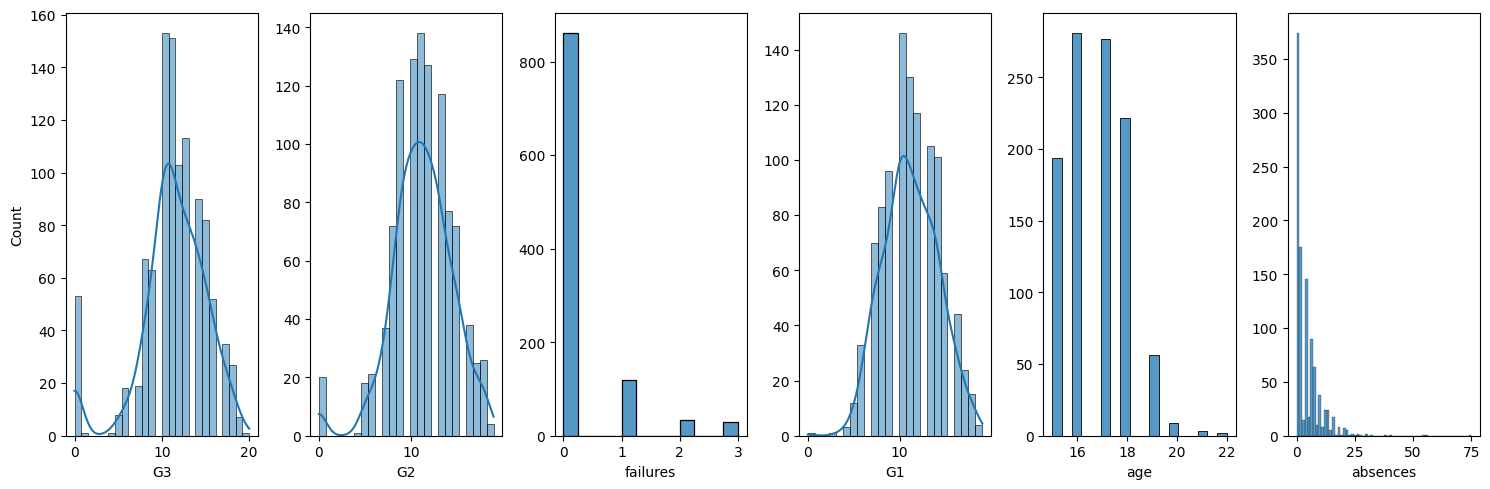

In [ ]:
countable = ['age', 'failures', 'absences']
not_countable = ['G1', 'G1', 'G3']

fig = plt.figure(figsize=(15,5))
for index,i in enumerate(set(num_columns) - set(new_obj)):
    if i in countable:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(x=df[i], stat='count', kde=False, ax=ax)
    else:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(x=df[i], stat='count', kde=True, ax=ax)
    if index+1 in [1]:
        axw.set_ylabel('Count')
    else:
        axw.set_ylabel('')
plt.tight_layout()

Now we move to `Bivariant` and `Multivariant` Analysis.  

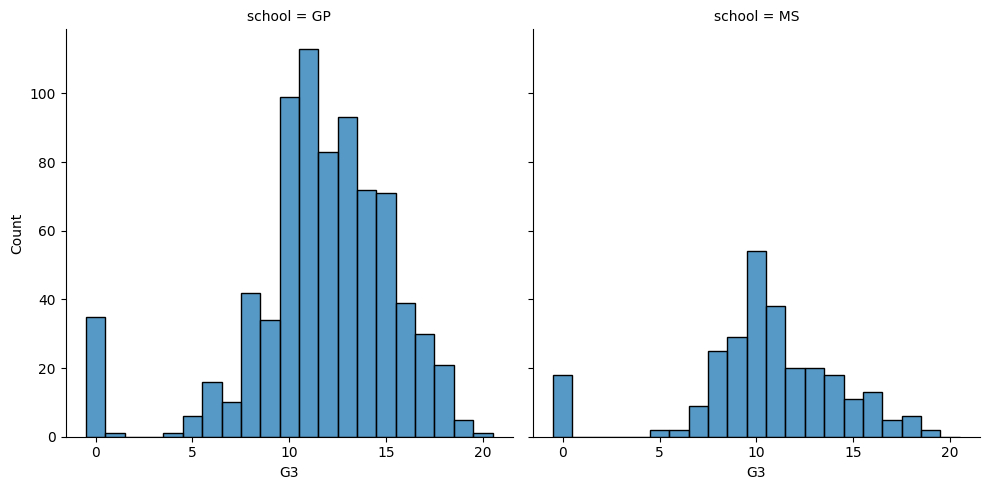

In [ ]:
sns.displot(df, x='G3', col="school", discrete=True) # here in dataset G3 is int64 but in reality it is float64 so here we set discrete to true for int64

In [ ]:
df[['G3', 'school']].groupby('school').mean()

G3
school           
GP      11.633420
MS      10.514706

In [ ]:
df['school'].value_counts(normalize=True)

GP    0.739464
MS    0.260536
Name: school, dtype: float64

We have to consider this fact that `school feature` is `imbalance` feature

lets see originally numeric variable

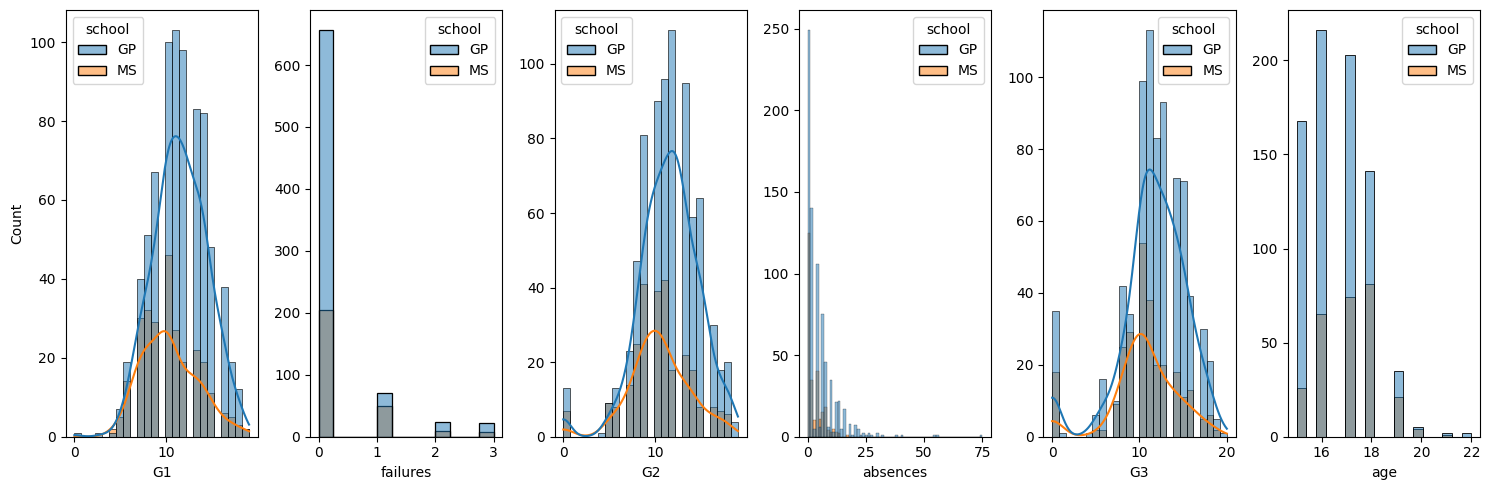

In [ ]:
countable = ['age', 'failures', 'absences']
not_countable = ['G1', 'G1', 'G3']

fig = plt.figure(figsize=(15,5))
for index,i in enumerate(set(num_columns) - set(new_obj)):
    if i in countable:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(data=df, x=i, hue='school', stat='count', kde=False, ax=ax)
    else:
      ax = fig.add_subplot(1,6,index+1)
      axw = sns.histplot(data=df, x=i, hue='school', stat='count', kde=True, ax=ax)
    if index+1 in [1]:
        axw.set_ylabel('Count')
    else:
        axw.set_ylabel('')
plt.tight_layout()

Lets see i what way school can affect features distribution.   
We can recreate our previous univariant hitogram plots using `school` as `hue` argument to analyse them in bivariant form.

In [ ]:
df[['internet','school']].groupby('internet').value_counts()

internet  school
no        GP        119
          MS         98
yes       GP        653
          MS        174
dtype: int64

Following Two plots are Example of what we going to have in next grid of plots.

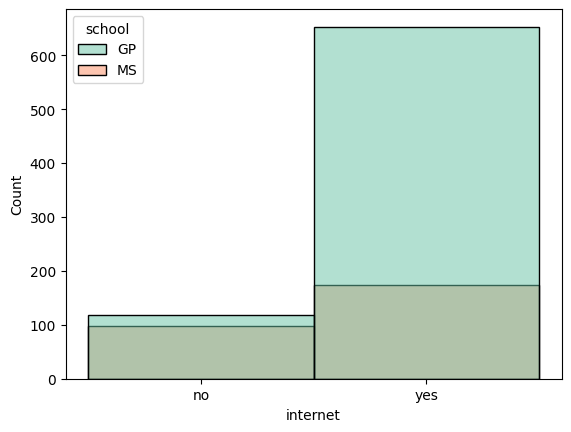

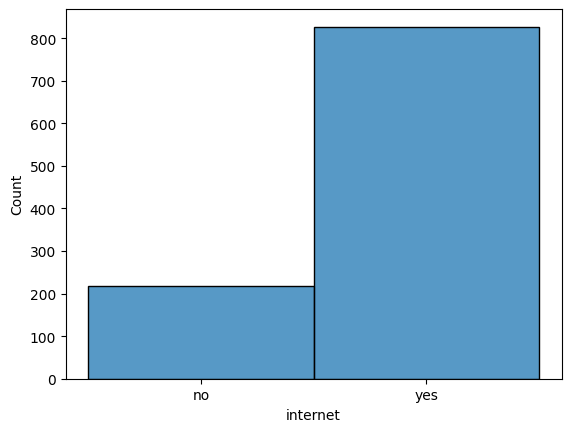

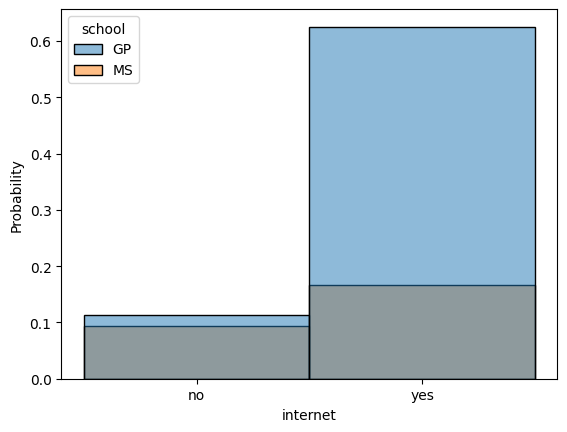

In [ ]:
sns.histplot(data=df, x='internet', stat='count', hue='school', palette=sns.color_palette("Set2"))
plt.show()
sns.histplot(data=df, x='internet', stat='count', palette=sns.color_palette("tab10"))
plt.show()
sns.histplot(data=df, x='internet', stat='probability',hue='school', palette=sns.color_palette("tab10"))
plt.show()

In [ ]:
df[['internet','school']].groupby('internet').value_counts()

internet  school
no        GP        119
          MS         98
yes       GP        653
          MS        174
dtype: int64

In [ ]:
119/df.shape[0]#(119+98+653+174) # probability calculated in all data record

0.11398467432950192

In [ ]:
df.shape[0]

1044

Next we have a Grid histogram plot with respect of `School` feature.

**Note:** Be aware About difference of `Density` and `Probability` parameters of `stat` argument

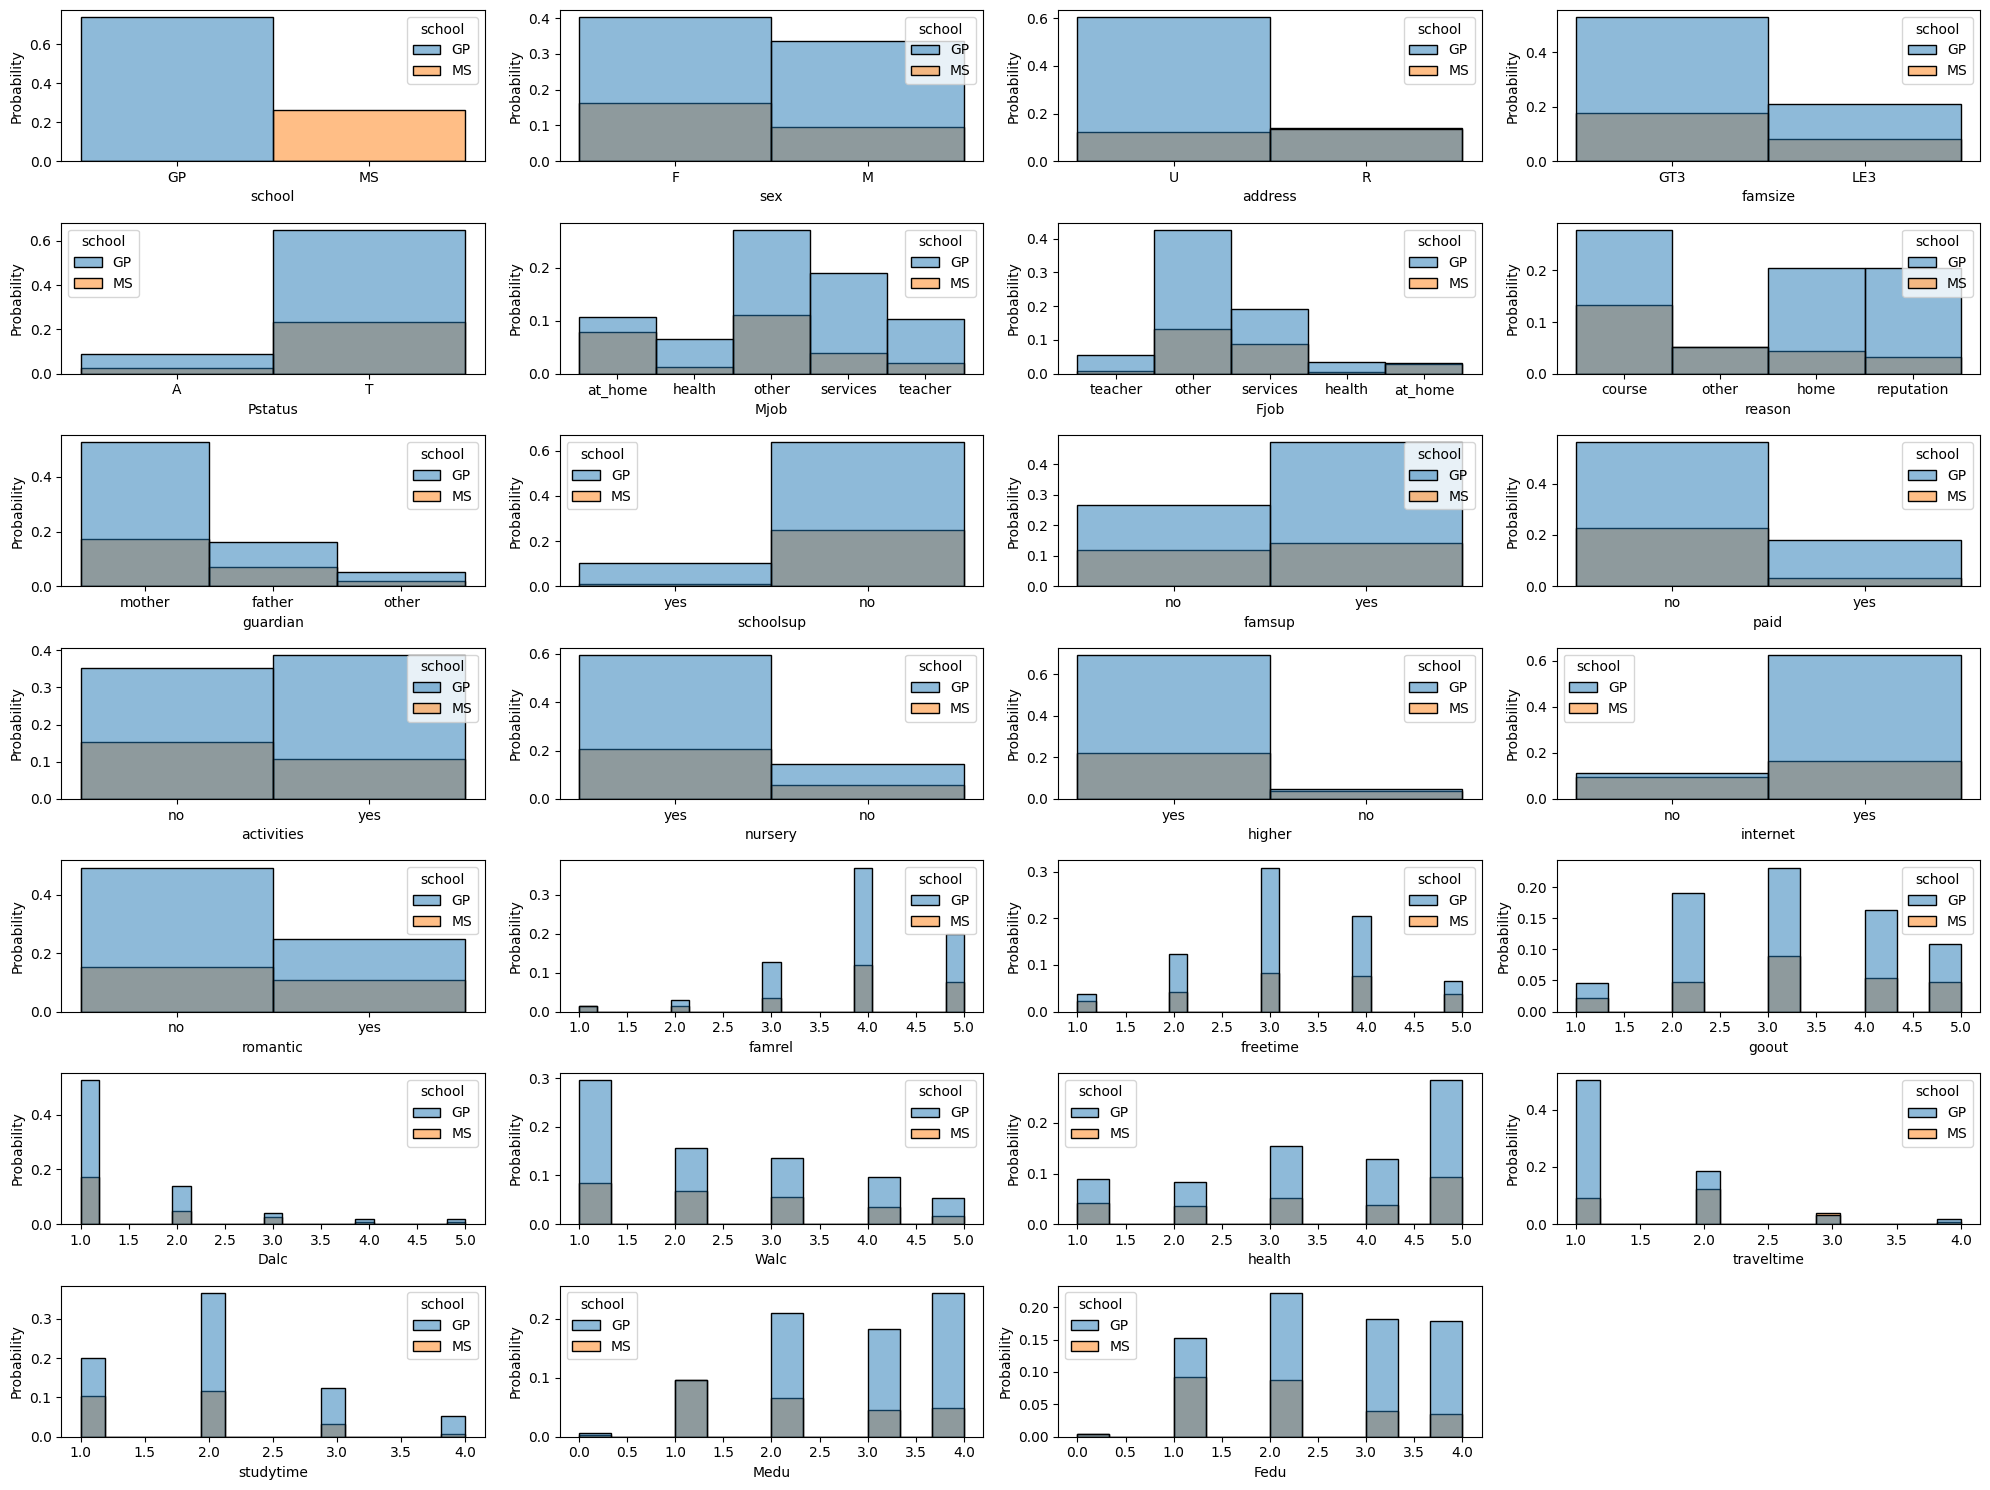

In [ ]:
fig = plt.figure(figsize=(20,15))

for index,i in enumerate(new_obj):

  ax = fig.add_subplot(7,4,index+1)
  sns.histplot(data=df, x=i, stat='probability', hue='school', ax=ax)
  plt.tight_layout()

Here we can mentioned some points:  
> 1. `GP` school has most of students.
> 2. in `Address` feature we can see some interesting and vague thing in `R` type of `Address` that needed further investigation just like `other` in `reason` feature  .
> 3. We can see somthing like previous note in `Fjob` feature in `at_home` type.
> 4. We can see in `GP` school students with extra educational support is much more higher than `MS`, also extra paid classes within the course subject `(paid)`.
> 5. we can see from distribution of `activities`, most of students of `GP` school want extra-curricular activities but in `MS` school the don't.  

Next we can plot `mean of G3 score` with respect of `unique values` of each `numerical columns`.

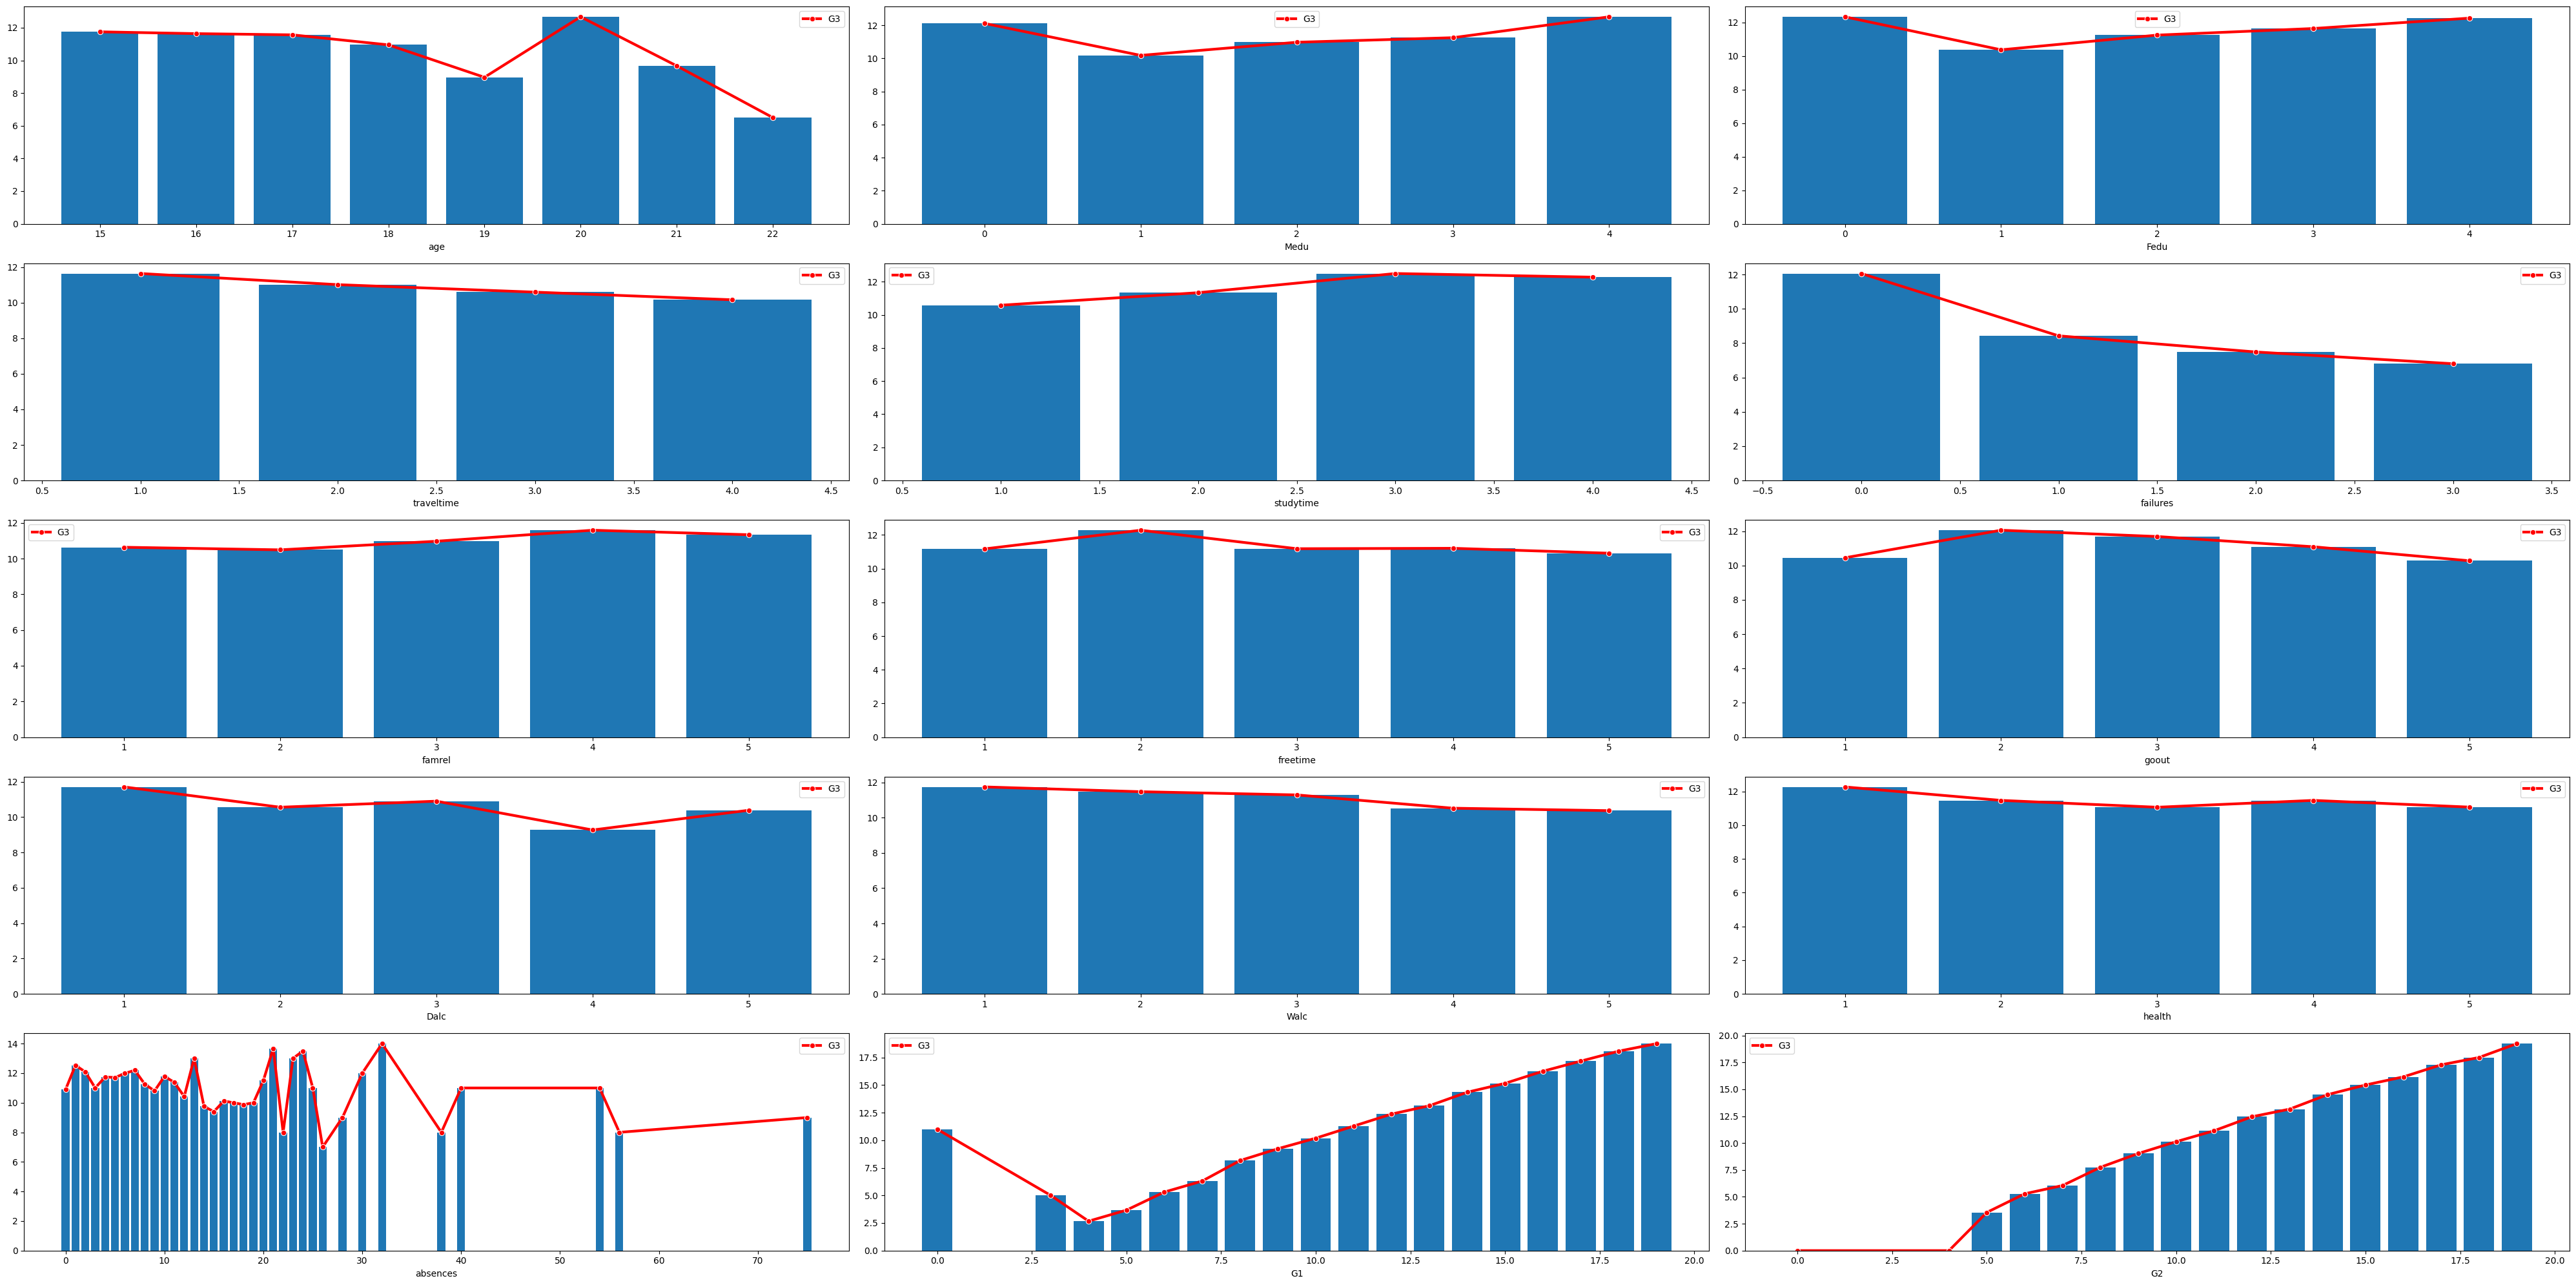

In [ ]:
plt.figure(figsize=(40,20))
for index,i in enumerate(num_columns):
    if i == 'G3':
        continue
    a = df[['G3', i]].groupby(i).mean()
    axis = plt.subplot(5,3,index+1)
    axis.bar(x=a.index, height=a.G3)
    sns.lineplot(a, marker='o', palette=['red'], ax=plt.subplot(5,3,index+1), linewidth=3)


plt.tight_layout()

Here we can see significant difference in scores(G3):  
1. students with age `22` have lowest and age `20` have highest mean of score.
2. students with `Father education` type `1` and `Mother education` type `1` have lowest mean of score.
3. there is `no` difference between mean of score of student with `studytime` 3 or 4.  
4. students with `0` failure have higher mean of score.
5. students with workday alcohol consumption type 4 have the lowest mean of score.
6. students with `26` number of school absences have lowest mean of score and on the other hand students with `32` number of school absences have highest mean of score


Next we can see our `First hypothesis` was wrong and mean of scores in `GP school` is not `equal` to `MS school`

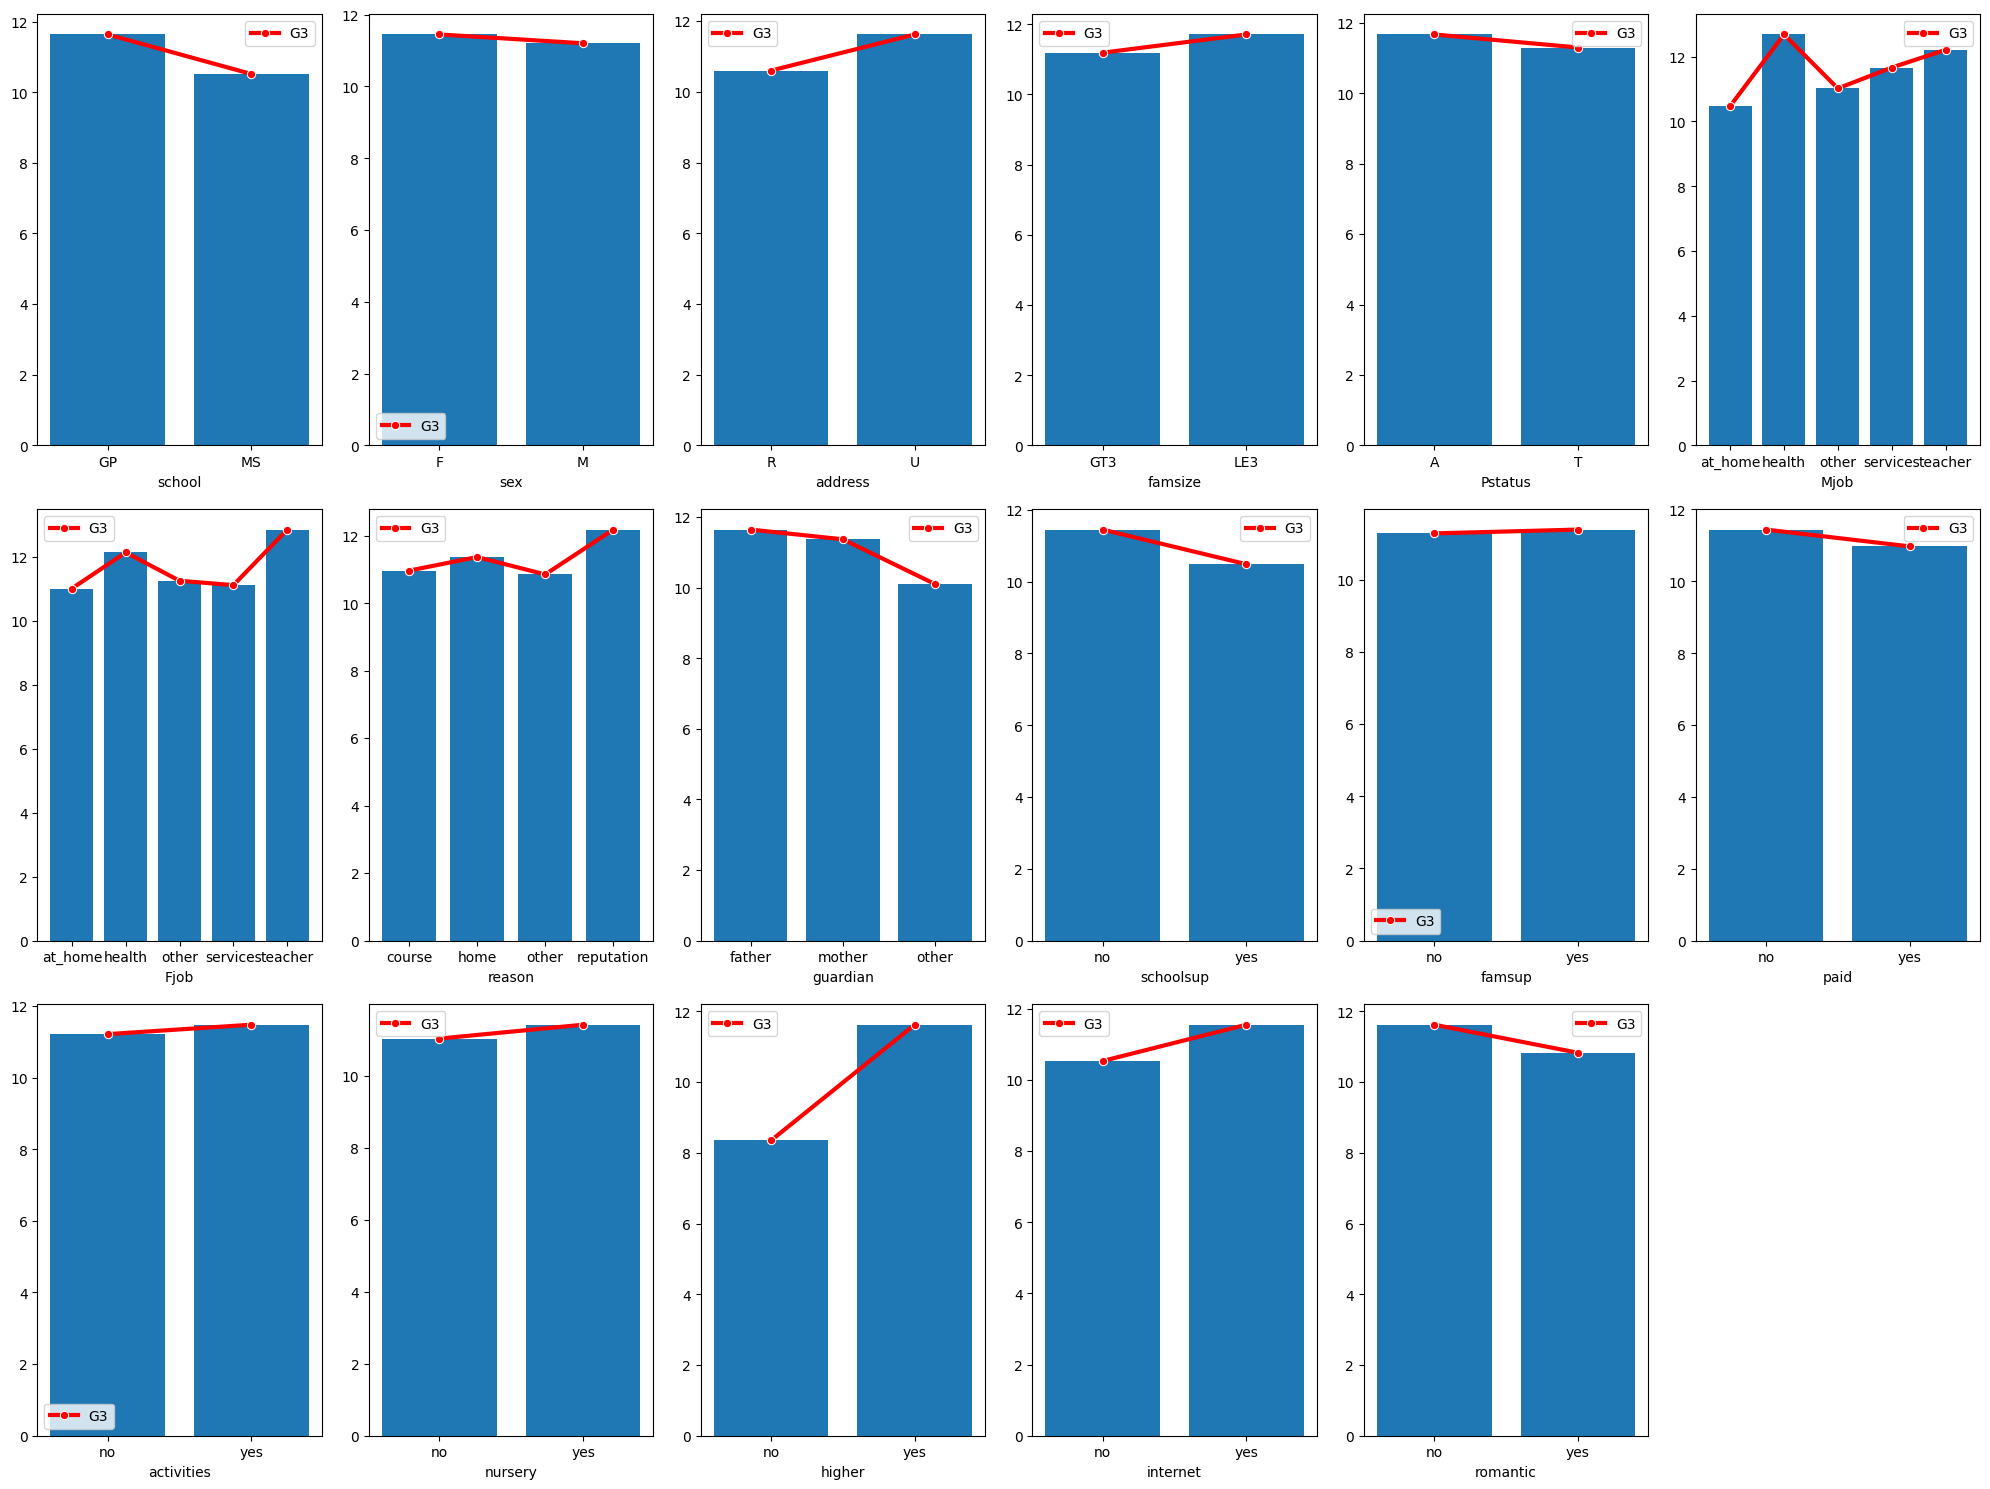

In [ ]:
plt.figure(figsize=(20,15))
for index,i in enumerate(obj_columns):
    a = df[['G3', i]].groupby(i).mean()
    axis = plt.subplot(3,6,index+1)
    axis.bar(x=a.index, height=a.G3)
    sns.lineplot(a, marker='o', palette=['red'], ax=axis, linewidth=3)

plt.tight_layout()

> score = G3  

We can see significant different in `Mjob`, `Fjob`, `reason`, `higher`, `guardian` columns.  
* student who they want to `continue their education` to higher level have higher mean score.
* students group with `no` mother and father as gurdian has lower mean score.
* students group that have `health` and `teacher` as the job of their mother or father have higher mean score.
* students group that chosen their school based on `reputation` have higher mean of score. (wierd thing !! XD)

# Outliers detection

In [ ]:
df.tail()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
1039     MS   M   20       U     LE3       A     2     2  services  services   
1040     MS   M   17       U     LE3       T     3     1  services  services   
1041     MS   M   21       R     GT3       T     1     1     other     other   
1042     MS   M   18       R     LE3       T     3     2  services     other   
1043     MS   M   19       U     LE3       T     1     1     other   at_home   

      ... famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
1039  ...      5        5      4     4     5      4       11   9   9   9  
1040  ...      2        4      5     3     4      2        3  14  16  16  
1041  ...      5        5      3     3     3      3        3  10   8   7  
1042  ...      4        4      1     3     4      5        0  11  12  10  
1043  ...      3        2      3     3     3      5        5   8   9   9  

[5 rows x 33 columns]

<Axes: title={'center': 'G3'}, xlabel='[school]'>

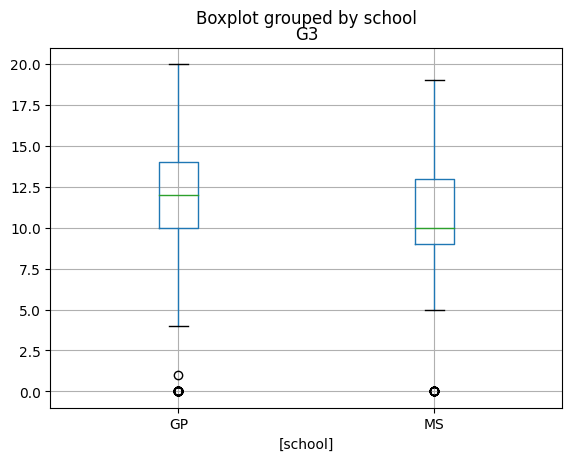

In [ ]:
df[['G3', 'school']].boxplot(by='school')

<Axes: >

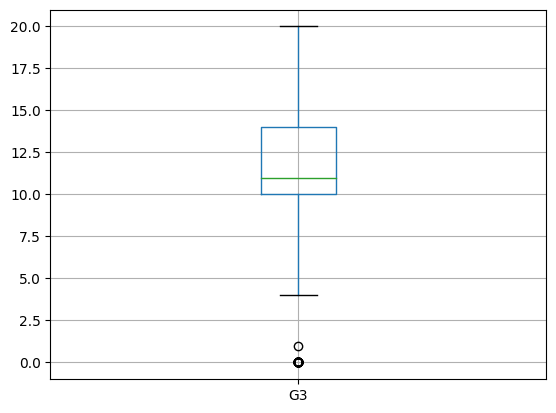

In [ ]:
df[['G3']].boxplot() #G3 box plot

We can see we have some outliers based on box plot that are `zero` and `near zero`.  
Lets see what they are...

In [ ]:
mask = df.G3 < 2.5
df[mask].G3.value_counts()

0    53
1     1
Name: G3, dtype: int64

we have **53** scores `0` and **1** score `1`.  
Obviously these score will bias our model and we should remove them.

In [ ]:
df.drop(index=df[mask].G3.index, inplace=True)

<Axes: >

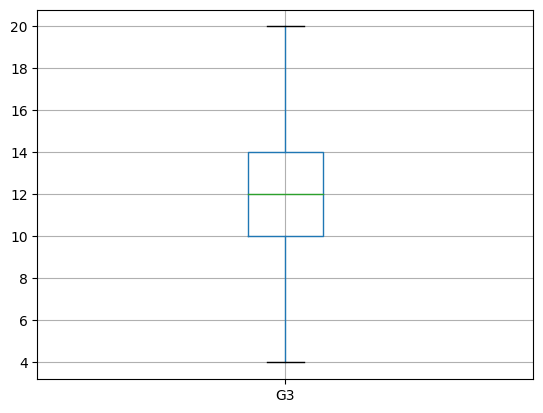

In [ ]:
df[['G3']].boxplot()

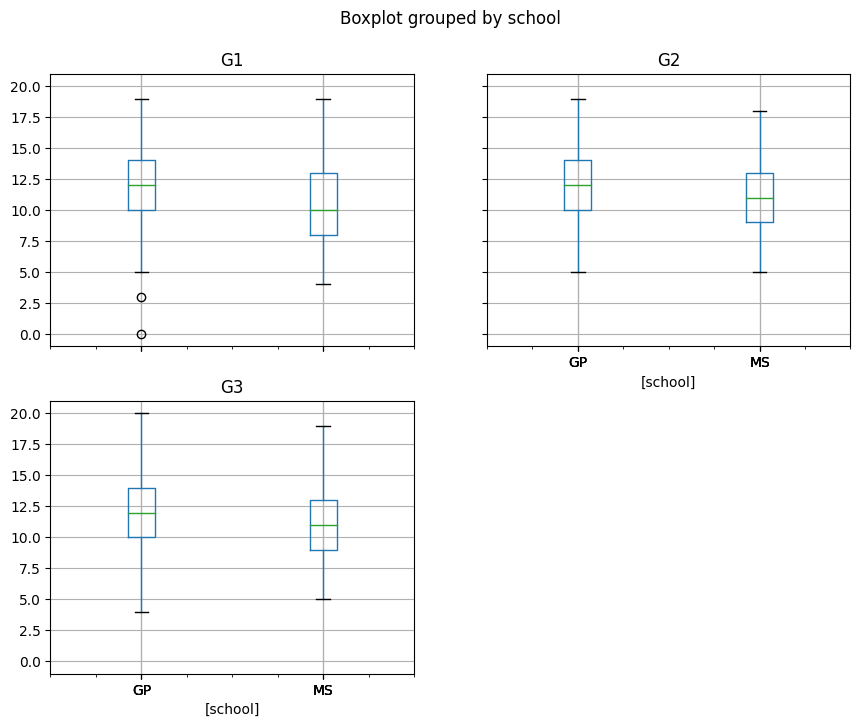

In [ ]:
# Create a figure and axes with specific size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data on the created axes
df[['G3', 'G2', 'G1', 'school']].boxplot(by='school', ax=ax)

# Show the plot
plt.show()



We can see some `outlier` based on boxplot on `G1` score with respect of `school` feature

In [ ]:
mask = df.G1 < 4
df[mask].G1.value_counts()

0    1
3    1
Name: G1, dtype: int64

We have `0` and `3` as outliers in `G1` score of `GP` school

In [ ]:
df.drop(index=df[mask].G1.index, inplace=True)

Lets check again

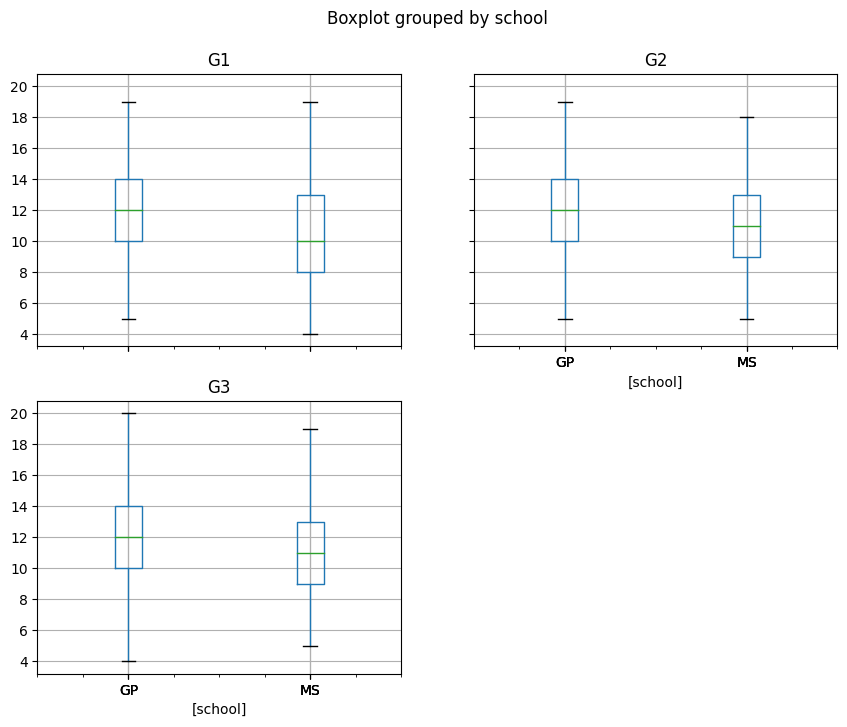

In [ ]:
# Create a figure and axes with specific size
fig, ax = plt.subplots(figsize=(10, 8))

# Plot the data on the created axes
df[['G3', 'G2', 'G1', 'school']].boxplot(by='school', ax=ax)

# Show the plot
plt.show()



Now they have approximately normal distribution shape

<Axes: ylabel='Probability'>

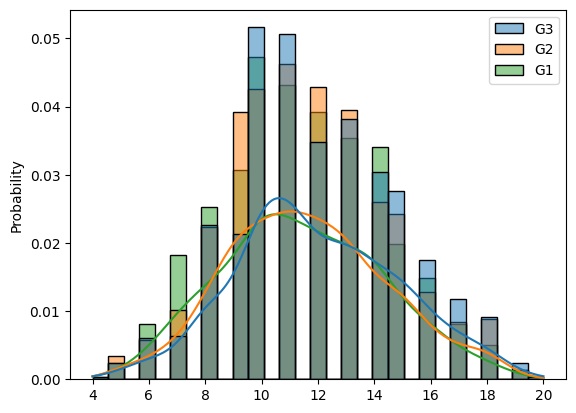

In [ ]:
sns.histplot(df[['G3', 'G2', 'G1']], stat='probability', kde=True)

We can see some right skewed in the shapes but it is better than previous.  

**Note**: We also removed outliers that detected based on scores and shchool features

# Feature Engineering

Descriptive Analysis for object variables

In [ ]:
des_obj = df.select_dtypes(include='object').describe()
des_obj.iloc[3, ] = des_obj.iloc[3, ] / df.shape[0]
des_obj.index = ['count', 'unique', 'top', 'relative freq']
des_obj

school       sex   address   famsize   Pstatus      Mjob  \
count               988       988       988       988       988       988   
unique                2         2         2         2         2         5   
top                  GP         F         U       GT3         T     other   
relative freq  0.742915  0.566802  0.732794  0.700405  0.882591  0.379555   

                   Fjob    reason  guardian schoolsup    famsup      paid  \
count               988       988       988       988       988       988   
unique                5         4         3         2         2         2   
top               other    course    mother        no       yes        no   
relative freq  0.561741  0.407895  0.698381  0.882591  0.618421  0.786437   

              activities   nursery    higher  internet romantic  
count                988       988       988       988      988  
unique                 2         2         2         2        2  
top                   no       yes       yes       yes       no  
relative freq   0.507085  0.800607  0.921053  0.796559  0.65587

based on what we see :
* `74 percent` students chosen in `GP` school
* parents of `88 percent` of students `live together`
* approximately `70 percent` of students have their `mother` as their guardian
* family of `61 percents` of students support them educationaly
* `80 percent` of students have internet

Descriptive analysis for numeric variables

In [ ]:
df.select_dtypes(exclude='object').describe()

age        Medu        Fedu  traveltime   studytime    failures  \
count  988.000000  988.000000  988.000000  988.000000  988.000000  988.000000   
mean    16.694332    2.617409    2.399798    1.516194    1.977733    0.229757   
std      1.233478    1.126894    1.100373    0.730533    0.834605    0.614619   
min     15.000000    0.000000    0.000000    1.000000    1.000000    0.000000   
25%     16.000000    2.000000    1.750000    1.000000    1.000000    0.000000   
50%     17.000000    3.000000    2.000000    1.000000    2.000000    0.000000   
75%     18.000000    4.000000    3.000000    2.000000    2.000000    0.000000   
max     22.000000    4.000000    4.000000    4.000000    4.000000    3.000000   

           famrel    freetime       goout        Dalc        Walc      health  \
count  988.000000  988.000000  988.000000  988.000000  988.000000  988.000000   
mean     3.940283    3.197368    3.152834    1.492915    2.291498    3.534413   
std      0.925534    1.035594    1.137873    0.915337    1.286690    1.431952   
min      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   
25%      4.000000    3.000000    2.000000    1.000000    1.000000    2.000000   
50%      4.000000    3.000000    3.000000    1.000000    2.000000    4.000000   
75%      5.000000    4.000000    4.000000    2.000000    3.000000    5.000000   
max      5.000000    5.000000    5.000000    5.000000    5.000000    5.000000   

         absences          G1          G2          G3  
count  988.000000  988.000000  988.000000  988.000000  
mean     4.674089   11.439271   11.620445   11.967611  
std      6.293325    2.864264    2.827113    2.887096  
min      0.000000    4.000000    5.000000    4.000000  
25%      0.000000    9.000000   10.000000   10.000000  
50%      2.000000   11.000000   11.000000   12.000000  
75%      6.000000   13.250000   13.000000   14.000000  
max     75.000000   19.000000   19.000000   20.000000

we can see G1, G2, G3 are simmilar to each other and we probably need some scaling for numeric features.

Now we focused on numeric variables that are not `encoded version` of `Categorical variable`

In [ ]:
df[list(set(num_columns) - set(new_obj))].describe().T

count       mean       std   min   25%   50%    75%   max
G3        988.0  11.967611  2.887096   4.0  10.0  12.0  14.00  20.0
G2        988.0  11.620445  2.827113   5.0  10.0  11.0  13.00  19.0
failures  988.0   0.229757  0.614619   0.0   0.0   0.0   0.00   3.0
G1        988.0  11.439271  2.864264   4.0   9.0  11.0  13.25  19.0
age       988.0  16.694332  1.233478  15.0  16.0  17.0  18.00  22.0
absences  988.0   4.674089  6.293325   0.0   0.0   2.0   6.00  75.0

Let's plot **`Pearson Correlation`** matirx to find out how variance of data are related to each other

<Axes: >

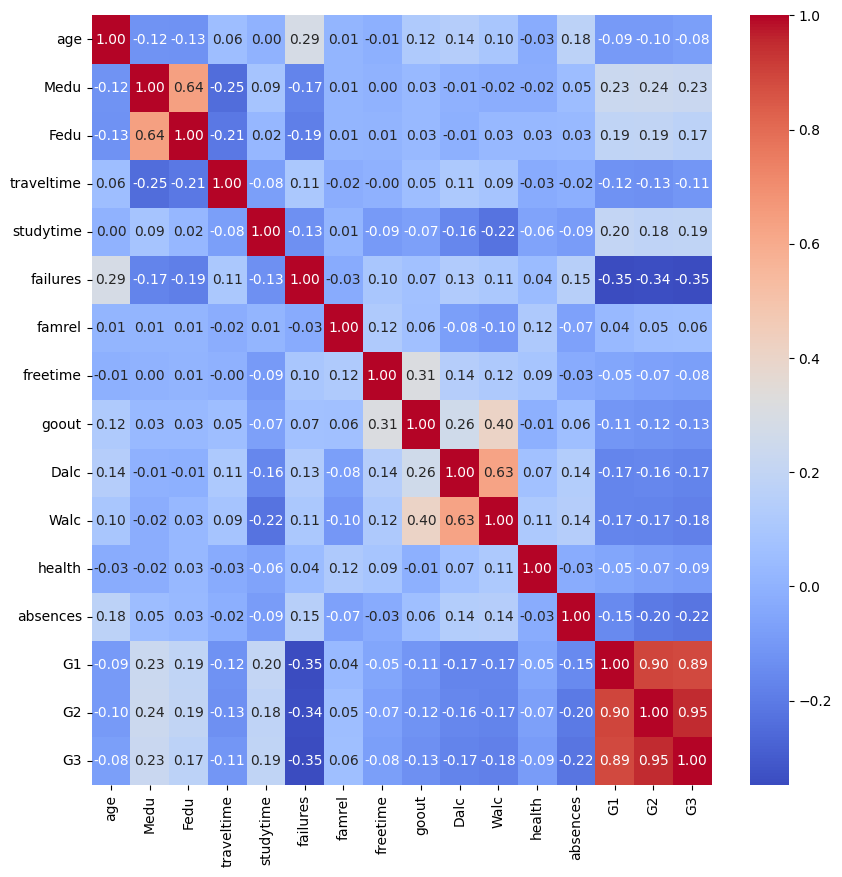

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='0.2f')

We can see there is good relationship between:
* `G1`,`G2`,`G3`
* `Dalc`,`Walc`
* `G1`,`G2`,`G3` and `failures`

We can see the `multicolinearity` in our dataset.  


---

And Aslo we can see some positive and negative correlation for example:  

Positive ones:
* `Fedu`, `Medu`, `Famrel`, `Studytime`  

Negative ones:  
* `Walc`, `Dalc`, `goout`, `absence`

**Note**: As you can see here in this Corelation it will be calculated based on variation of data in each group, so we the relationship is actualy is more complex than what we calculate here, But it can give us a good point of view.

draw a pair plot will help us to better visualize data relation and distribution.  
> We plot it with respect of `school` feature.

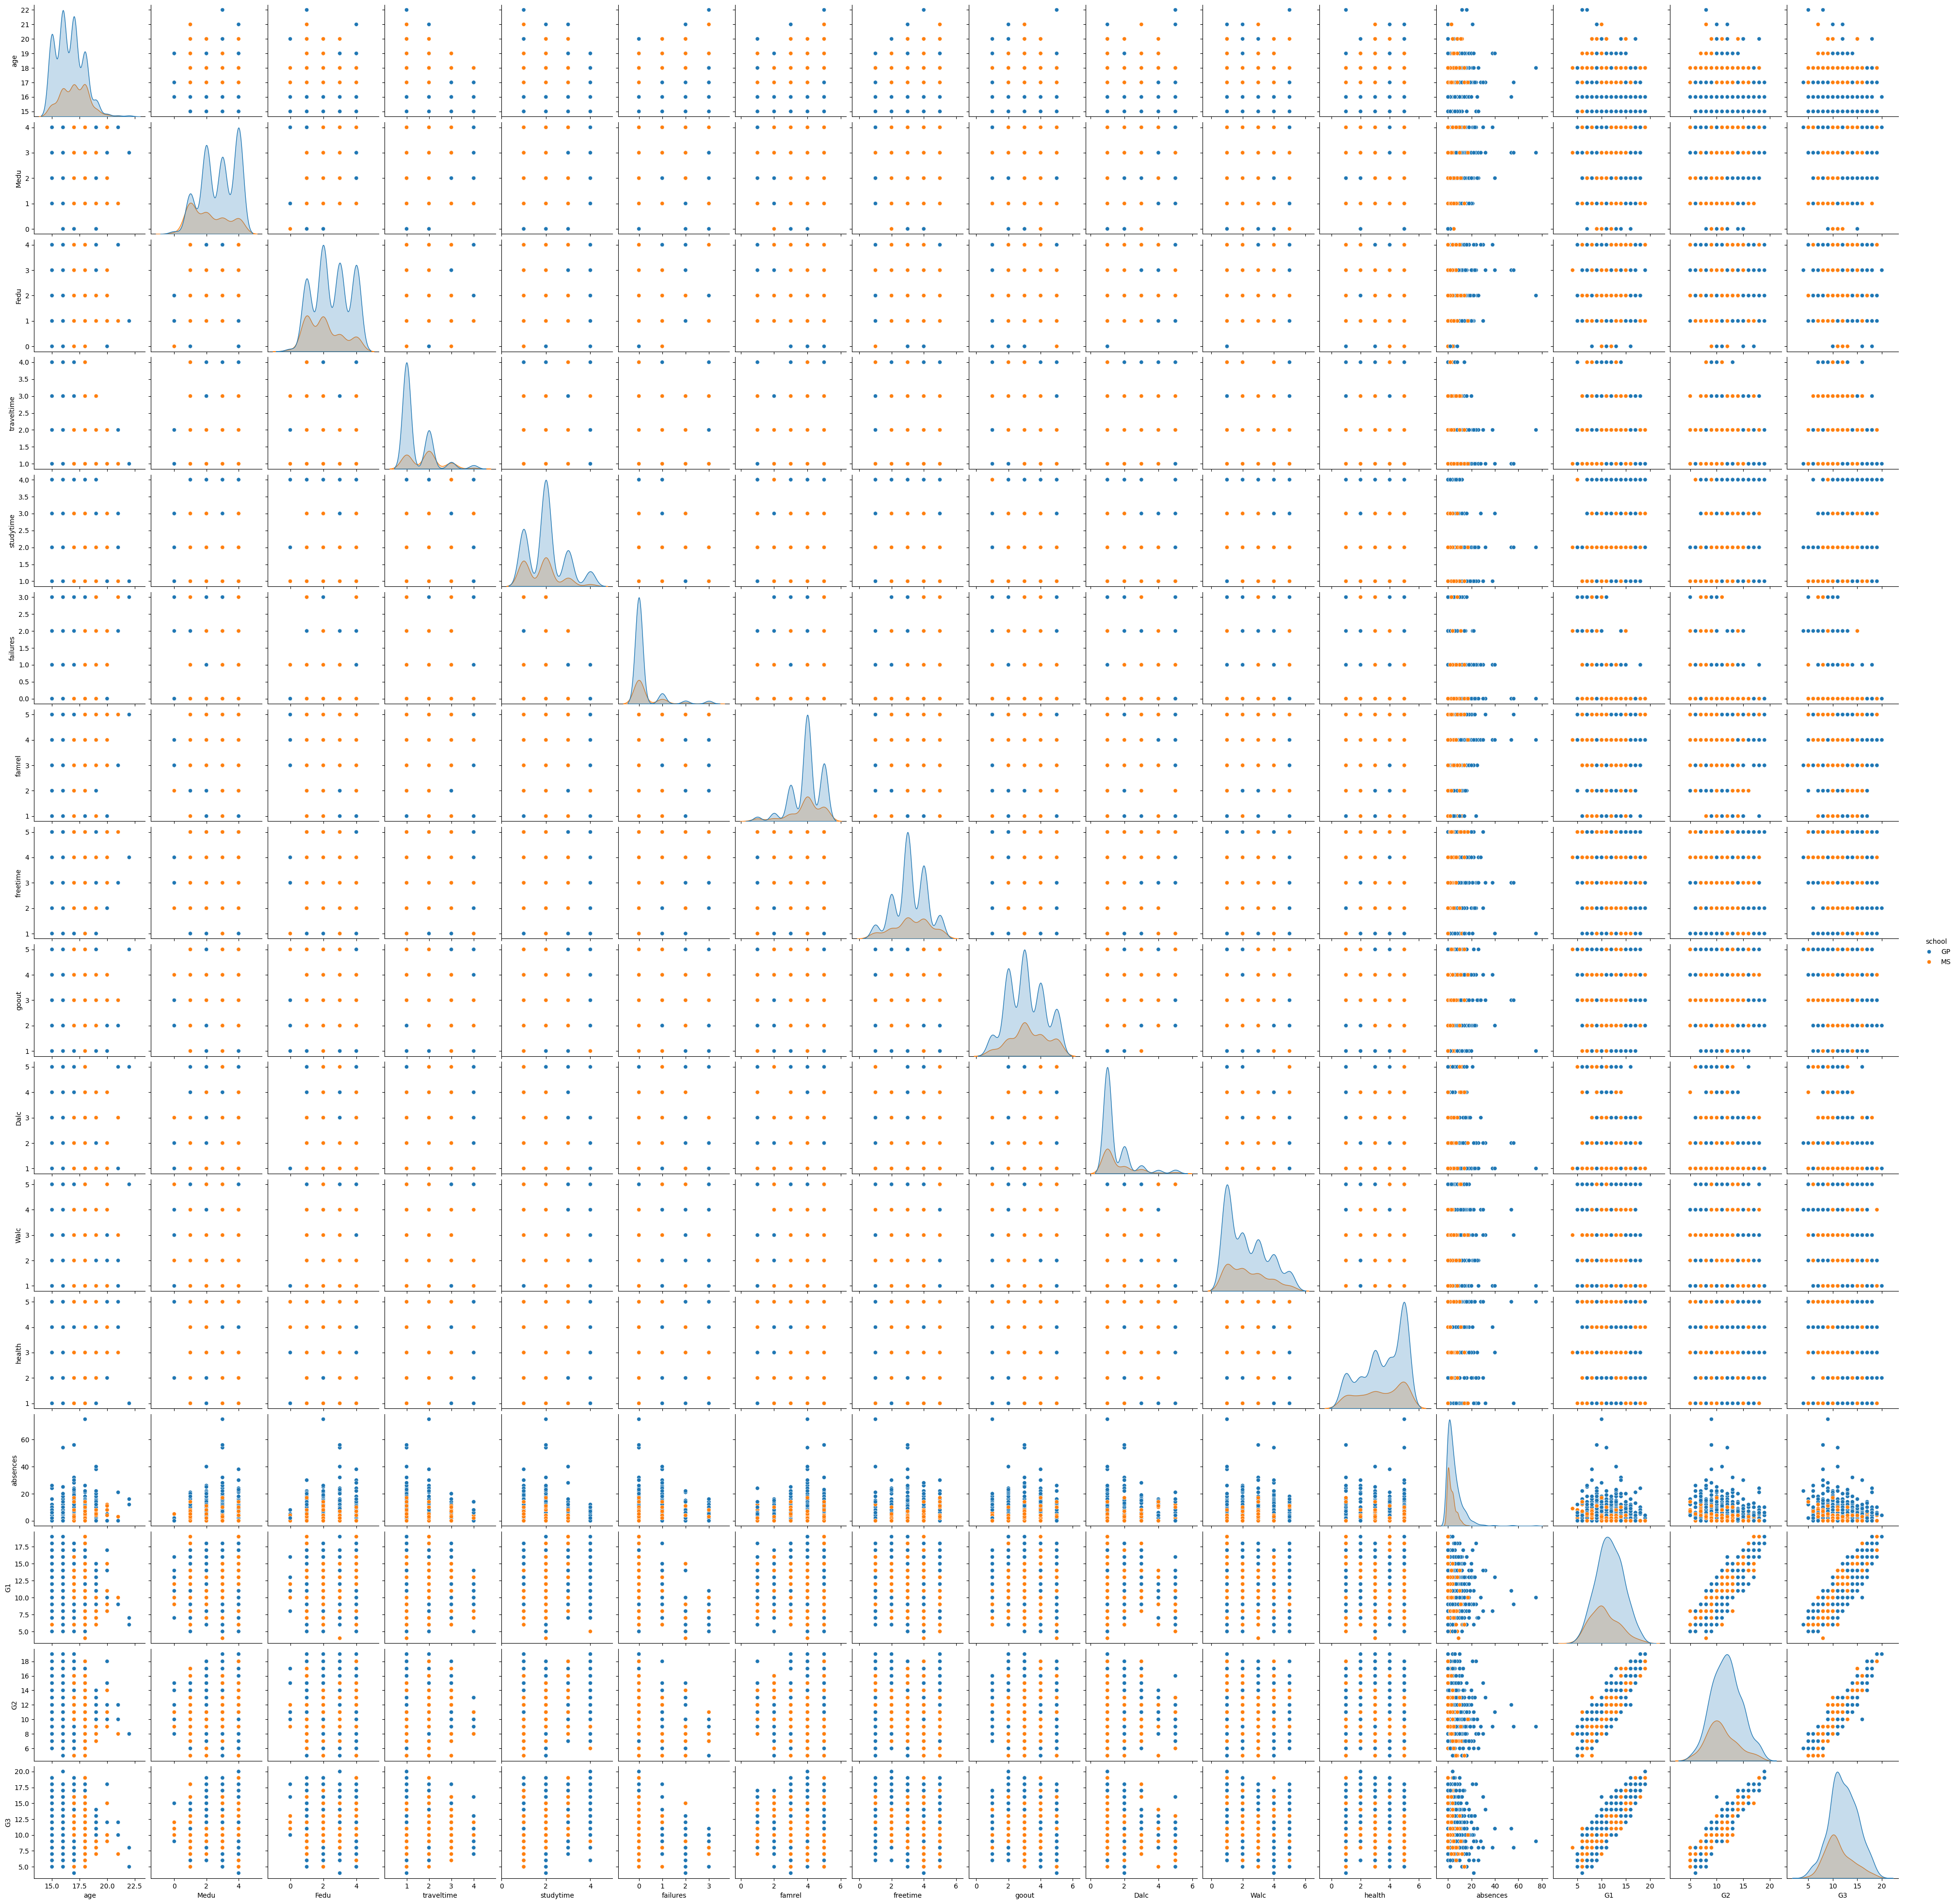

In [ ]:
#pair plot
sns.pairplot(df, hue='school')

**`Clasified G3`**

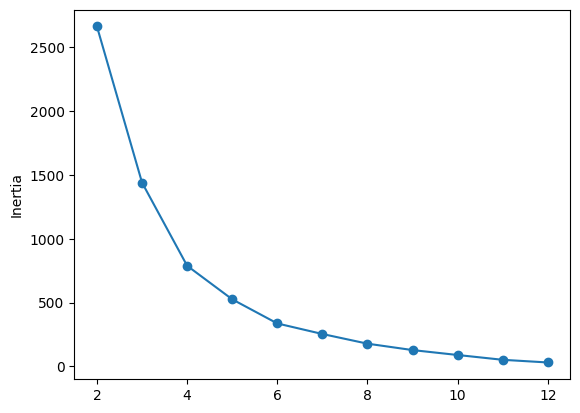

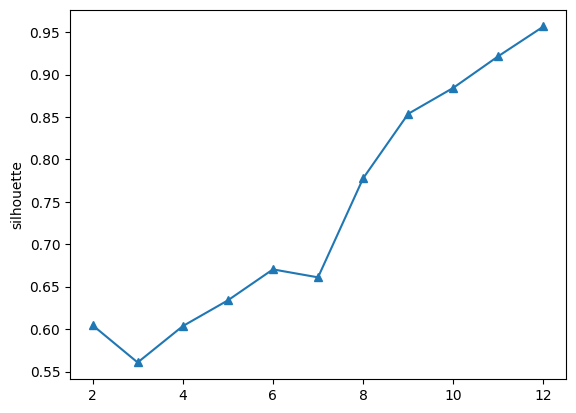

In [ ]:
inertia, silhouette = [], []

# Number of clusters
for k in range(2,13):
  # Create a KMeans instance with k clusters
  kmeans = KMeans(n_clusters=k, random_state=0)

  # Fit the model
  kmeans.fit(df[['G3']])

  # Cluster assignments for each data point
  assignments = kmeans.labels_

  # Inertia
  inertia.append(kmeans.inertia_)

  # Silhouette Score
  silhouette.append(silhouette_score(df[['G3']], kmeans.labels_))


plt.plot(range(2,13), inertia, marker='o')
plt.ylabel('Inertia')
plt.show()
plt.plot(range(2,13), silhouette, marker='^')
plt.ylabel('silhouette')
plt.show()


Base on these two results i decided to divide G3 into **9 bins**


---

**Note**: This Feature actuly `does not` exist in train set but we can use it to change our approch to [classification](https://) problem or we can use this bins to divide `G2` and `G1`.

In [ ]:
k = 9
# Create a KMeans instance with k clusters
kmeans = KMeans(n_clusters=k, random_state=0)

# Fit the model
# kmeans.fit(df[['G3']])
kmeans.fit(df[['G2']])
labels_fitted = kmeans.labels_

We add **`labels_fitted`** to our dataset

In [ ]:
df['n_clustre'] = labels_fitted

and i want to **`Clasified G3 into bad, normal, good`** for changing problem to Classififcation.

We use an easy approach by using cut method of pandas.

In [ ]:
mini = df['G3'].min()
maxi = df['G3'].max()
mini, maxi

(4, 20)

Let's check out the bins to ensure we did not lose any records.

In [ ]:
pd.cut(df['G3'], bins=[mini-1,10,15,maxi], labels=[1, 2, 3]).isnull().sum()

0

In [ ]:
df['G3_bins'] = pd.cut(df['G3'], bins=[mini-1,10,15,maxi+1], labels=[1, 2, 3])

In [ ]:
df['G3_bins'].value_counts()

2    538
1    328
3    122
Name: G3_bins, dtype: int64

<Axes: xlabel='G3_bins', ylabel='Count'>

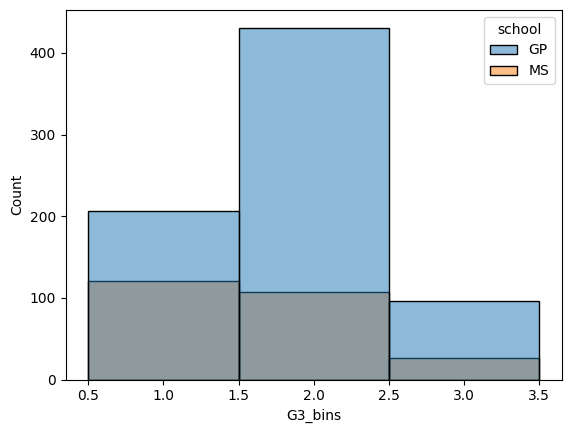

In [ ]:
sns.histplot(data=df[['G3_bins','school']], x='G3_bins', hue='school')

We can see different pattern in both school here in this new feature also.

**`Pre_score_mean Feature`**.  
we want to create a feature that is combination G1 and G2

In [ ]:
df['Pre_score_mean'] = df[['G1', 'G2']].mean(axis=1)

In [ ]:
df['Total Score'] = df['G1'] + df['G2']

**`Skewness`**  
We shoud change skewness of our skewed fearures

In [ ]:
skewness_overall = df.skew(numeric_only=True).sort_values(ascending=False)

# filter skewed features
skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)]

absences      3.703773
failures      3.043485
Dalc          2.173436
traveltime    1.396806
studytime     0.659994
Walc          0.614111
famrel       -1.064525
dtype: float64

In [ ]:
skewed_features = skewness_overall[(skewness_overall > 0.5) | (skewness_overall < -0.5)].index
skewed_features

Index(['absences', 'failures', 'Dalc', 'traveltime', 'studytime', 'Walc',
       'famrel'],
      dtype='object')

Lets apply some Transformation on our features to make them less skewed

In [ ]:
np.sqrt(df['absences']).skew()

0.5357591431958711

We can not use `log` or `boxcox` if we have records that are`negative` or `zero`.  
We can solve this challange a little by adding constant to each values

In [ ]:
df[skewed_features].min()

absences      0
failures      0
Dalc          1
traveltime    1
studytime     1
Walc          1
famrel        1
dtype: int64

We have Two features that contain `Zero`, We solve it by adding constant one to each values

In [ ]:
np.log(df['absences'] + 1).skew(), np.log(df['failures'] + 1).skew()

(0.08299310637665615, 2.390487339613232)

In [ ]:
for i in skewed_features:
  if i in ['absences', 'failures']:
    df[i] = np.log(df[i] + 1)
    print(f'skewness of {i} : ', df[i].skew())
    continue
  df[i] = np.log(df[i])
  print(f'skewness of {i} : ', df[i].skew())

skewness of absences :  0.08299310637665615
skewness of failures :  2.390487339613232
skewness of Dalc :  1.3916259686809096
skewness of traveltime :  0.7961516353914099
skewness of studytime :  -0.12985592919202626
skewness of Walc :  0.06708062812981605
skewness of famrel :  -2.3884330491321575


As you can see here we increase skewness of `famrel`, but we let it be for now.

> **Note**: We saw that we had `multicolinearity` it will affect ou regression model therefore We can use `dimension reduction techniques` to reduce `dimension` and `multicolinearity`.

In [ ]:
df.head()

school sex  age address famsize Pstatus  Medu  Fedu      Mjob      Fjob  \
1     GP   F   17       U     GT3       T     1     1   at_home     other   
2     GP   F   15       U     LE3       T     1     1   at_home     other   
3     GP   F   15       U     GT3       T     4     2    health  services   
4     GP   F   16       U     GT3       T     3     3     other     other   
5     GP   M   16       U     LE3       T     4     3  services     other   

   ...      Dalc      Walc  health  absences  G1  G2  G3 n_clustre  \
1  ...  0.000000  0.000000       3  1.098612   9  11  11         2   
2  ...  0.693147  1.098612       3  1.945910  12  13  12         0   
3  ...  0.000000  0.000000       5  0.000000  14  14  14         0   
4  ...  0.000000  0.693147       5  0.000000  11  13  13         0   
5  ...  0.000000  0.693147       5  1.945910  12  12  13         8   

  Pre_score_mean Total Score  
1           10.0          20  
2           12.5          25  
3           14.0          28  
4           12.0          24  
5           12.0          24  

[5 rows x 36 columns]

In [ ]:
df.isnull().sum().sum()

0

We do not have any `NaN` values

# PCA, Deep Learning Encoder  
In this Part we `perform PCA` to reduce **dimension** and **multicolinearity**.  
> Also we in **Feuture version** of notebook we Implement ```Deep Learning Encoder``` to **create new features** and **denoising dataset**  

In [ ]:
#-NOTHING HERE

# Machine Learning Implementation

## Preprocessing  
Here we prepare dataset to use in Machine Learning models

In [ ]:
X_df = df.drop(columns=['G3'])
Y = df['G3']

In [ ]:
X_df.head()

school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  romantic    famrel  freetime  goout      Dalc      Walc health  absences  \
0       no  2.000000         3      4  1.000000  1.000000      3  2.000000   
1       no  2.236068         3      3  1.000000  1.000000      3  1.414214   
2       no  2.000000         3      2  1.414214  1.732051      3  2.449490   
3      yes  1.732051         2      2  1.000000  1.000000      5  0.000000   
4       no  2.000000         3      2  1.000000  1.414214      5  0.000000   

  G3_bins Pre_score  
0       1        11  
1       1        20  
2       1        25  
3       1        28  
4       1        24  

[5 rows x 32 columns]

we need to change categorical variables to numeric variables

In [ ]:
X_df.select_dtypes(include="O").describe()

school  sex address famsize Pstatus   Mjob   Fjob  reason guardian  \
count     988  988     988     988     988    988    988     988      988   
unique      2    2       2       2       2      5      5       4        3   
top        GP    F       U     GT3       T  other  other  course   mother   
freq      734  560     724     692     872    375    555     403      690   

       schoolsup famsup paid activities nursery higher internet romantic  
count        988    988  988        988     988    988      988      988  
unique         2      2    2          2       2      2        2        2  
top           no    yes   no         no     yes    yes      yes       no  
freq         872    611  777        501     791    910      787      648

there is no ordinal variables therefore we use `get_dummies` or binary one hot encoder.

In [ ]:
pd.get_dummies(X_df.select_dtypes(include="O")).columns

Index(['school_GP', 'school_MS', 'sex_F', 'sex_M', 'address_R', 'address_U',
       'famsize_GT3', 'famsize_LE3', 'Pstatus_A', 'Pstatus_T', 'Mjob_at_home',
       'Mjob_health', 'Mjob_other', 'Mjob_services', 'Mjob_teacher',
       'Fjob_at_home', 'Fjob_health', 'Fjob_other', 'Fjob_services',
       'Fjob_teacher', 'reason_course', 'reason_home', 'reason_other',
       'reason_reputation', 'guardian_father', 'guardian_mother',
       'guardian_other', 'schoolsup_no', 'schoolsup_yes', 'famsup_no',
       'famsup_yes', 'paid_no', 'paid_yes', 'activities_no', 'activities_yes',
       'nursery_no', 'nursery_yes', 'higher_no', 'higher_yes', 'internet_no',
       'internet_yes', 'romantic_no', 'romantic_yes'],
      dtype='object')

In [ ]:
X = pd.get_dummies(X_df)

In [ ]:
X.shape

(988, 61)

In [ ]:
X.isnull().sum().sum(), Y.isnull().sum()

(0, 0)

Split dataset

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=432)

To prevent data leakage we fit scaler on train set

In [ ]:
# standardaize and normalize

In [ ]:
X_test.shape, y_test.shape, X_train.shape, y_train.shape

((297, 61), (297,), (691, 61), (691,))

## Traditional Machine Learning  
In this section we implement Traditional Machine Learning

### Regreassion
Here We have Regression Algorithms

We implement `Polynomial Regression`

In [ ]:
mse_list = []
r2_list = []

In [ ]:
mse_poly = []
r2_poly = []
Xpoly_scaler = StandardScaler()
for i in range(2,4):
    print(f'Degree {i}')
    X_poly = PolynomialFeatures(degree=i).fit_transform(X)
    x_train, x_test = train_test_split(X_poly, test_size=0.3, random_state=432)
    x_train = Xpoly_scaler.fit_transform(x_train)
    x_test = Xpoly_scaler.transform(x_test)
    print(f"test set: {x_test.shape}, {y_test.shape}")
    print(f"train set: {x_train.shape}, {y_train.shape}")
    ml_poly = LinearRegression()
    ml_poly.fit(x_train, y_train)
    score = ml_poly.score(x_test, y_test)
    mse = mean_squared_error(y_pred=ml_poly.predict(x_test), y_true=y_test)
    mse_poly.append(mse)
    r2_poly.append(score)
    print(f'Mean Square Error: {mse}, R2_Score: {score}')
    print('-------------------------------')

mse_list.append(mse_poly)
r2_list.append(r2_poly)

Degree 2
test set: (297, 1891), (297, 1)
train set: (693, 1891), (693, 1)
Mean Square Error: 5.545163214947234, R2_Score: -5.8305362727328705
-------------------------------
Degree 3
test set: (297, 39711), (297, 1)
train set: (693, 39711), (693, 1)
Mean Square Error: 0.34485809256467675, R2_Score: 0.5752035388500447
-------------------------------
Degree 4


In [ ]:
# degree 4 and 5 will have to much fetures and need more resourse for computing

Next we imlement `Multiple Linear Regression`

In [ ]:
mlr = LinearRegression()
print(f"test set: {X_test.shape}, {y_test.shape}")
print(f"train set: {X_train.shape}, {y_train.shape}")
mlr.fit(X_train, y_train)
score = mlr.score(X_test, y_test)
mse = mean_squared_error(y_pred=mlr.predict(X_test), y_true=y_test)
print(f'Mean Square Error: {mse}, R2_Score: {score}')

mse_list.append(mse)
r2_list.append(score)

test set: (297, 61), (297,)
train set: (691, 61), (691,)
Mean Square Error: 0.707503948649172, R2_Score: 0.9192686811398243


In [ ]:
y_test

384    10
757    13
393    15
591    14
287    10
       ..
680    17
296    16
366    13
99     13
523     6
Name: G3, Length: 297, dtype: int64

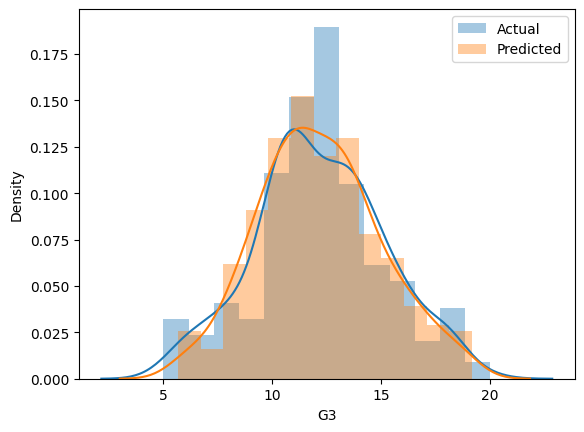

In [ ]:
pred = mlr.predict(X_test)
# plt.plot(pred)
sns.distplot(y_test, label='Actual')
sns.distplot(pred, label='Predicted')
plt.legend()

Next we implement **Regularized** Regression algorithms `(Lasso, Ridge)`

In [ ]:
#-  Regularized Regression algorithms (Lasso, Ridge)

### Fine Tune Traditional Models
We use Gride Search to Fine Tune best models,  
Also  we use CrossVal to validate models.

In [ ]:
# Fine Tune Traditional Models
#
# We use Gride Search to Fine Tune best models,
# Also we use CrossVal to validate models.

## Deep Learning  
Here we use `Tensorflow.Keras` to create an `DNN architect` for our problem.

In [ ]:
#- Here we use Tensorflow.Keras to create an DNN architect for our problem.

### Fine Tune Deep Learning Models
We use Gride Search to Fine Tune best models,  
Also  we use CrossVal to validate models.

In [ ]:
# Fine Tune Deep Learning Models
#
# We use Gride Search to Fine Tune best models,
# Also we use CrossVal to validate models.

# Review

***you can see cross val results in Cells Below***

# Conclusion  
1. Point #1
2. Point #2
3. Point #3
1. ...

# Next Steps
1. Point #1
2. Point #2
3. Point #3
1. ...

# Author  

> [Mrpintime](https://www.linkedin.com/in/moein-zeidanlou/)


---
